# Regressão Linear

Vamos supor que tenhamos dados em tabela sobre duas variáveis: **x** e **y**. Se colocarmos cada par **(x,y)** em um gráfico, teremos uma figura como a seguinte:

![1](https://matheusfacure.github.io/img/tutorial/regr_lin_mqo/scatter.png)

O que o algoritmo de regressão linear faz é simplesmente achar a reta que melhor se encaixa entre os pontos:

Assim, podemos prever (com erro) um valor de y dado um valor de x. Por exemplo, nós não temos uma observação em que x=1, mas gostaríamos de prever qual seria o valor de y caso x fosse 1. Basta então olhar na linha qual valor de y quando x assume o valor 1. Na imagem acima, y seria aproximadamente 2.5 (ponto amarelo).

![2](https://matheusfacure.github.io/img/tutorial/regr_lin_mqo/scatter_line.png)

Ok. Esse exemplo é bem simples e meramente ilustrativo. Suponha agora que y não dependa mais apenas de x, mas de x e z. Bem, nesse caso, teríamos um gráfico em 3D e a regressão linear acharia o plano que melhor se encaixa nos dados. E para mais dimensões? Digamos que y dependa de 100 variáveis. Nós não podemos mais visualizar esse caso, mas sabemos que não é muito diferente dos casos 2D ou 3D, só que agora a regressão linear acha o hiperplano que melhor se encaixa nos dados. Se isso está um pouco abstrato e difícil de visualizar, pense  sempre em 3D quando trabalhando com muitas dimensões. É um truque muito útil que eu aprendi em um vídeo do professor de Geoffrey Hinton e, segundo ele, todo mundo faz isso: quando tentar visualizar 100 dimensões, por exemplo, pense em 3D e grite para si mesmo "100D" e você conseguirá abstrair grandes dimensionalidades.

### Justificativa matemática
Imagine que temos dados em tabela, sendo que cada linha é uma observação e cada coluna uma variável. Então escolhemos uma das colunas para ser nossa variável dependente y (aquela que queremos prever) e as outras serão as variáveis independentes (X). Nosso objetivo é aprender como chegar das variáveis independentes na variável dependente, ou, em outras palavras, prever y a partir de X. Note que X é uma matriz nxd, em que n é o número de observações e d o número de dimensões; y é um vetor coluna nx1. Podemos definir o problema como um sistema de equações em que cada equação é uma observação:

$\begin{cases}
w_0 + w_1 x_1 + ... + w_d x_1 = y_1 \\
w_0 + w_1 x_2 + ... + w_d x_2 = y_2 \\
... \\
w_0 + w_1 x_n + ... + w_d x_n = y_n \\
\end{cases}$

Normalmente $n > d$, isto é, temos mais observações que dimensões. Sistemas assim costumam não ter solução, pois há muitas equações e poucas variáveis para ajustar. Intuitivamente, pense que, na prática, muitas coisas afetam a variável y, principalmente se ela for algo de interesse das ciências humanas como, por exemplo, preço, desemprego, felicidade etc. Muitas das coisas que afetam y não podem ser coletadas como dados; desse modo, as equações acima não teriam solução porque não teríamos todos os fatores que afetam y.

Para lidar com esse problema, vamos adicionar nas equações um termo erro ε que representará os fatores que não conseguimos observar, erros de medição, etc.

$\begin{cases}
w_0 + w_1 x_{11} + ... + w_d x_{1d} + \varepsilon_1 = y_1 \\
w_0 + w_1 x_{21} + ... + w_d x_{2d} + \varepsilon_2 = y_2 \\
... \\
w_0 + w_1 x_{n1} + ... + w_d x_{nd} + \varepsilon_3 = y_n \\
\end{cases}$

Ou, em forma de matriz:

$\begin{bmatrix}
1 & x_{11} & ... & x_{1d} \\
1 & x_{21} & ... & x_{2d} \\
\vdots & \vdots& \vdots & \vdots \\
1 & x_{n1} & ... & x_{nd} \\
\end{bmatrix}
\times
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_d \\
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_0 \\
\varepsilon_1 \\
\vdots \\
\varepsilon_n \\
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n \\
\end{bmatrix}$

$X_{nd} \pmb{w}_{d1} + \pmb{\epsilon}_{n1} = \pmb{y}_{n1}$

Para estimar a equação acima, usaremos a técnica de Mínimos Quadrados Ordinários (MQO): queremos achar os $\pmb{\hat{w}}$  que minimizam os $n \varepsilon^2$, ou, na forma de vetor, $\pmb{\epsilon}^T \pmb{\epsilon}$. Por que minimizar os erros quadrados? Assim como todo algoritmo de Aprendizado de Máquina, regressão linear também pode ser encarada como problemas de minimização de função custo. Então, nesse caso, nossa função custo é $L = \pmb{\epsilon}^T \pmb{\epsilon}$. Um nome comum dessa função é o custo quadrático $L2$, pois nesse caso o custo é o quadrado da norma $L2$ do vetor $\pmb{\epsilon}$. Note que nós poderíamos usar também a norma $L1$ do mesmo vetor como função custo. Ou ainda, poderíamos usar outras funções que adicionam uma penalidade também para o tamanho de $\pmb{\hat{w}}$, como acontece nos algoritmos de regressão Ridge ou Lasso, mas isso terá que ficar para outro tutorial. Por hora, a soma dos mínimos quadrados bastará como função custo, até porque ela tem a vantagem de deixar a matemática muito mais simples:

$\pmb{\epsilon}^T  \pmb{\epsilon} = (\pmb{y} - \pmb{\hat{w}}X)^T(\pmb{y} - \pmb{\hat{w}} X) \\= \pmb{y}^T \pmb{y} - \pmb{\hat{w}}^T X^T \pmb{y} - \pmb{y}^T X \pmb{\hat{w}} + \pmb{\hat{w}} X^T X \pmb{\hat{w}} \\= \pmb{y}^T \pmb{y} - 2\pmb{\hat{w}}^T X^T \pmb{y} + \pmb{\hat{w}} X^T X \pmb{\hat{w}}$

![]()

![]()


In [1]:
import pandas as pd # para ler os dados em tabela
import numpy as np # para álgebra linear
from sklearn import linear_model, model_selection, datasets
import matplotlib.pyplot as plt # para fazer gráficos
from matplotlib import style
from time import time # para ver quanto tempo demora
np.random.seed(1) # para resultados consistentes 

In [2]:
class linear_regr(object):

    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        # adiciona coluna de 1 nos dados
        X = np.insert(X_train, 0, 1, 1)

        # estima os w_hat
        # (X^T * X)^-1 * X^T * y
        w_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y_train)

        self.w_hat = w_hat
        self.coef = self.w_hat[1:]
        self.intercept = self.w_hat[0]

    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, 1) # adiciona coluna de 1 nos dados
        y_pred = np.dot(X, self.w_hat) # X * w_hat = y_hat
        return y_pred

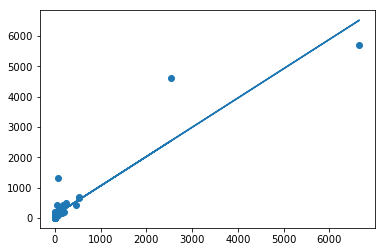

In [3]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#read data
dataframe = pd.read_fwf('brain_body.txt')
x_values = dataframe[['Brain']]
y_values = dataframe[['Body']]

#train model on data
body_reg = linear_model.LinearRegression()
body_reg.fit(x_values, y_values)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, body_reg.predict(x_values))
plt.show()

In [5]:
# separa em bases de treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size = 0.3, random_state = 1)
dataframe.head(5)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [7]:
t0 = time()
regr = linear_regr()
regr.fit(X_train, y_train)
print("Tempo do criado manualmente:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços

print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())

# comparando com o de mercado
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("\n\nTempo do de mercado:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços
w_hat = regr.intercept_
w_hat = np.append(w_hat, regr.coef_)

print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())

ValueError: Shape of passed values is (2, 43), indices imply (1, 43)